[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/username/repository/blob/main/notebook.ipynb)


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

# Dataset


In [80]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat (2).csv


In [81]:
math_df = pd.read_csv('student-mat.csv', sep=';')
print(math_df.shape)
math_df.head()

missing_counts = math_df.isnull().sum()
print(missing_counts)

(395, 33)
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Feature types


In [82]:
math_df.info()
print("unique:\n", math_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [83]:
cat_cols = math_df.select_dtypes(include='object').columns
num_cols = math_df.select_dtypes(include='number').columns.tolist()

print("categorical columns;", cat_cols)
print("numerical columns:", num_cols)

categorical columns; Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


# Encoding

In [84]:
for cols in cat_cols:
  le = LabelEncoder()
  math_df[cols] = le.fit_transform(math_df[cols])

In [85]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


# Mathmatical transformation

In [86]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

transformed_df = math_df.copy()
pt = PowerTransformer(method='yeo-johnson')
transformed_df[num_cols] = pt.fit_transform(transformed_df[num_cols])
transformed_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.041662,1,0,0,1.177841,1.334339,0,4,...,-0.076922,-0.260086,0.813128,-0.654266,-1.139257,-0.504639,0.559227,-1.996956,-1.268999,-1.041743
1,0,0,0.338006,1,0,1,-1.542924,-1.425954,0,2,...,1.368839,-0.260086,-0.055870,-0.654266,-1.139257,-0.504639,0.244999,-1.996956,-1.505855,-1.041743
2,0,0,-1.460045,1,1,1,-1.542924,-1.425954,0,2,...,-0.076922,-0.260086,-0.993689,1.400624,0.749982,-0.504639,0.975255,-1.214078,-0.769807,-0.166650
3,0,0,-1.460045,1,0,1,1.177841,-0.454069,1,3,...,-1.144500,-1.233142,-0.993689,-0.654266,-1.139257,1.097410,-0.239555,1.203399,0.887567,1.057130
4,0,0,-0.486022,1,0,1,0.185307,0.460370,2,2,...,-0.076922,-0.260086,-0.993689,-0.654266,0.031447,1.097410,0.244999,-1.591415,-0.241437,-0.166650


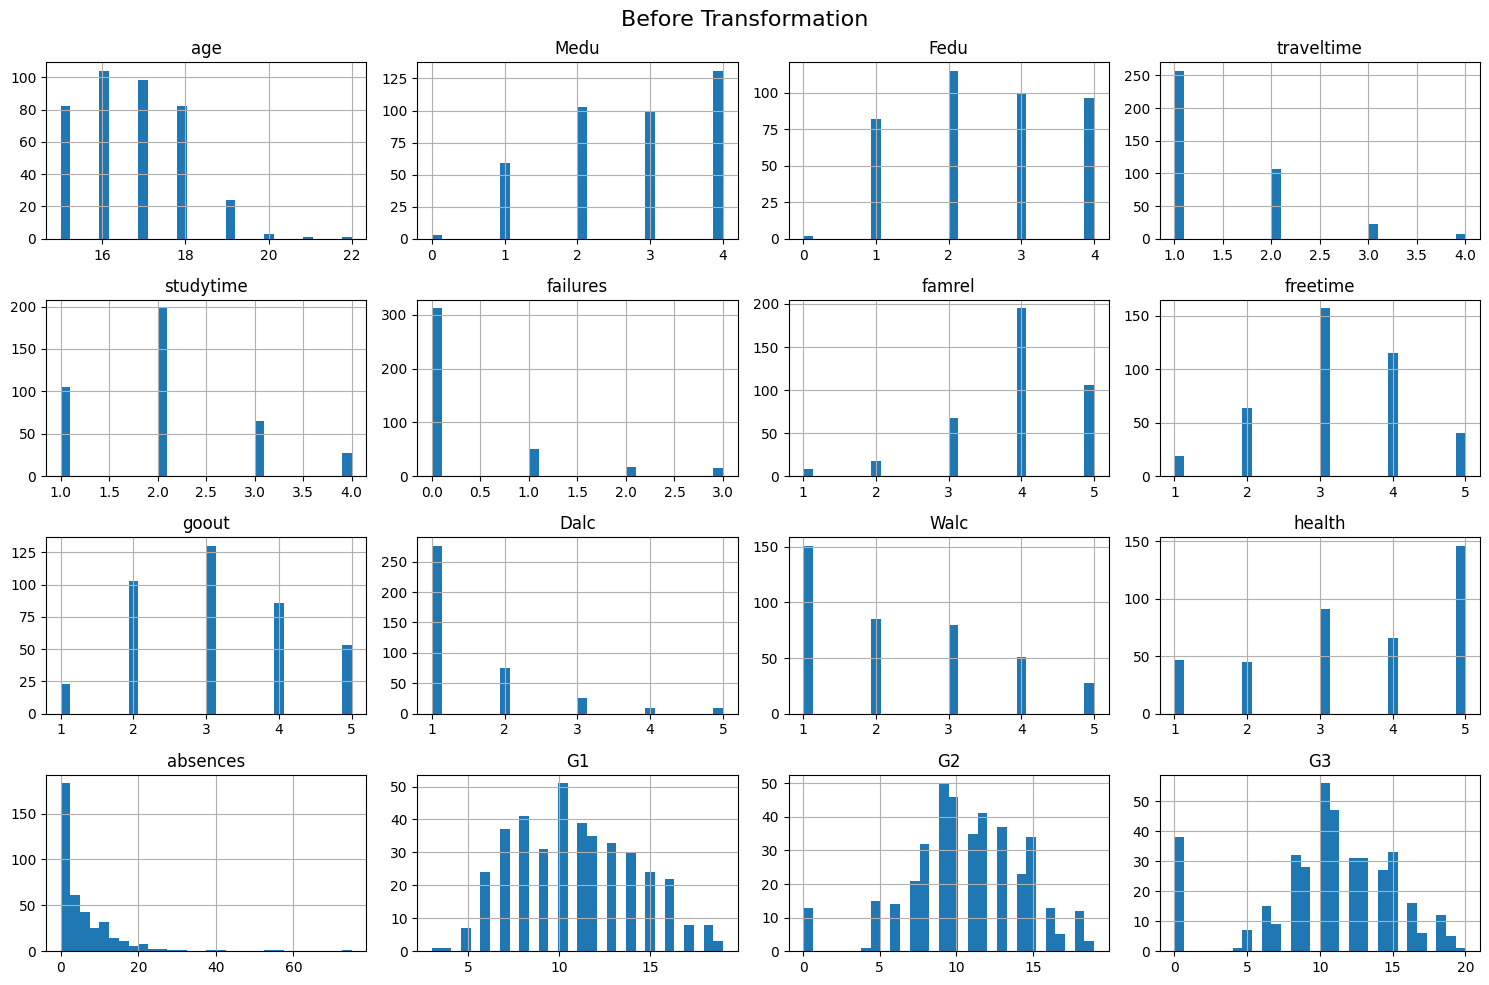

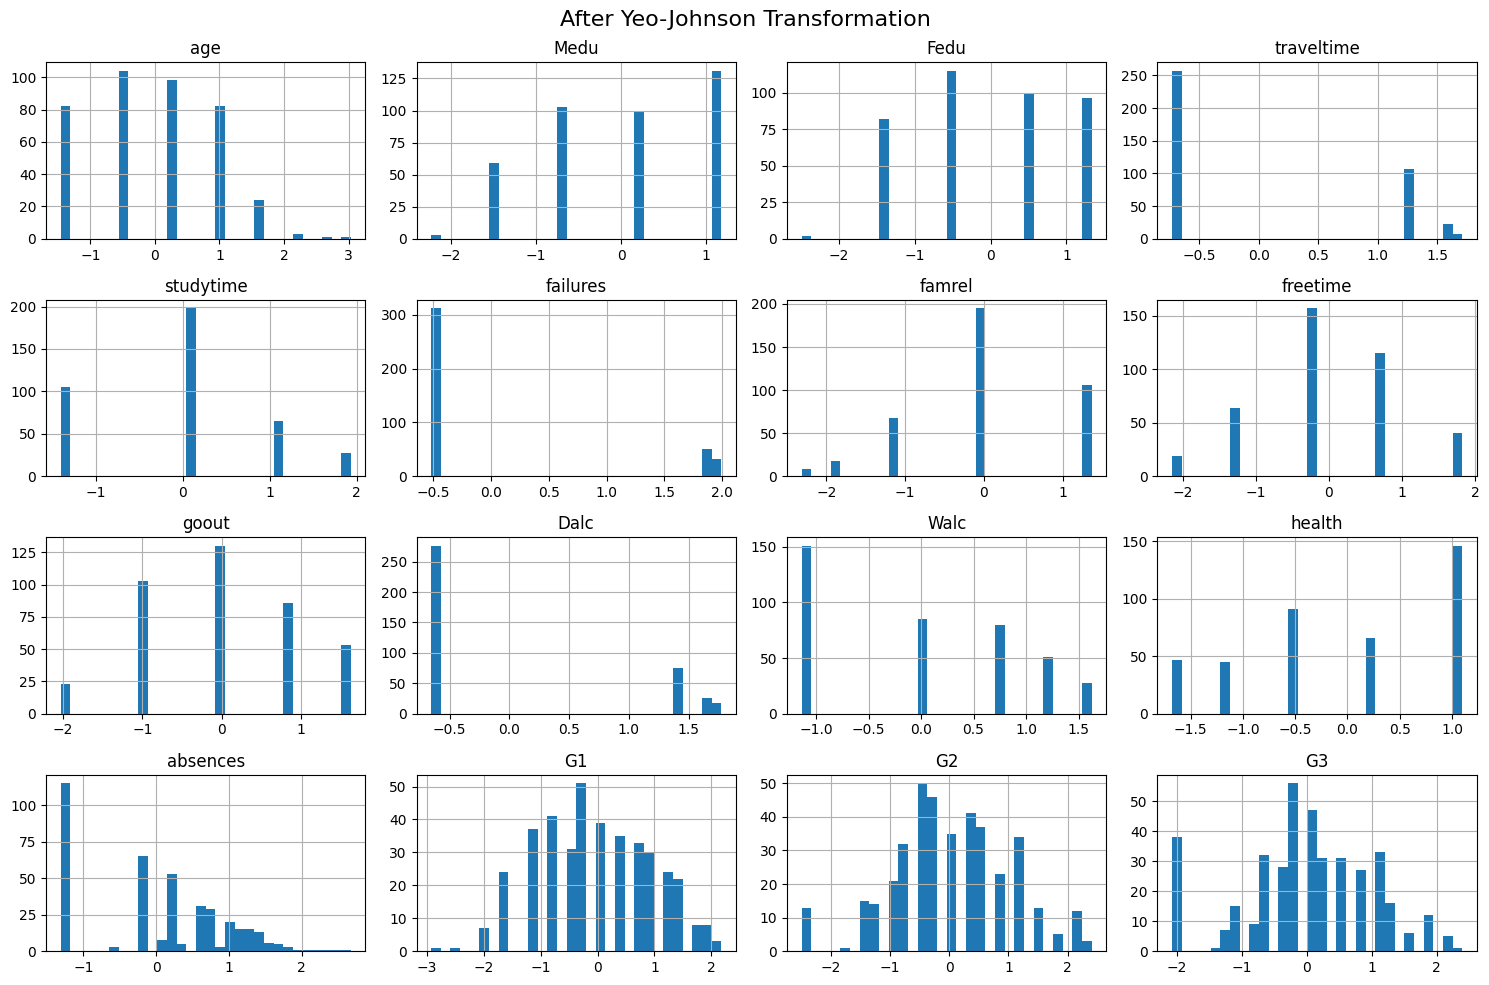

In [87]:

# Plot before transformation
math_df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Before Transformation", fontsize=16)
plt.tight_layout()
plt.show()

# Plot after transformation
transformed_df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("After Yeo-Johnson Transformation", fontsize=16)
plt.tight_layout()
plt.show()


In [88]:
standardized = StandardScaler()

standard_df= math_df.copy()
standard_df[num_cols] = standardized.fit_transform(standard_df[num_cols])


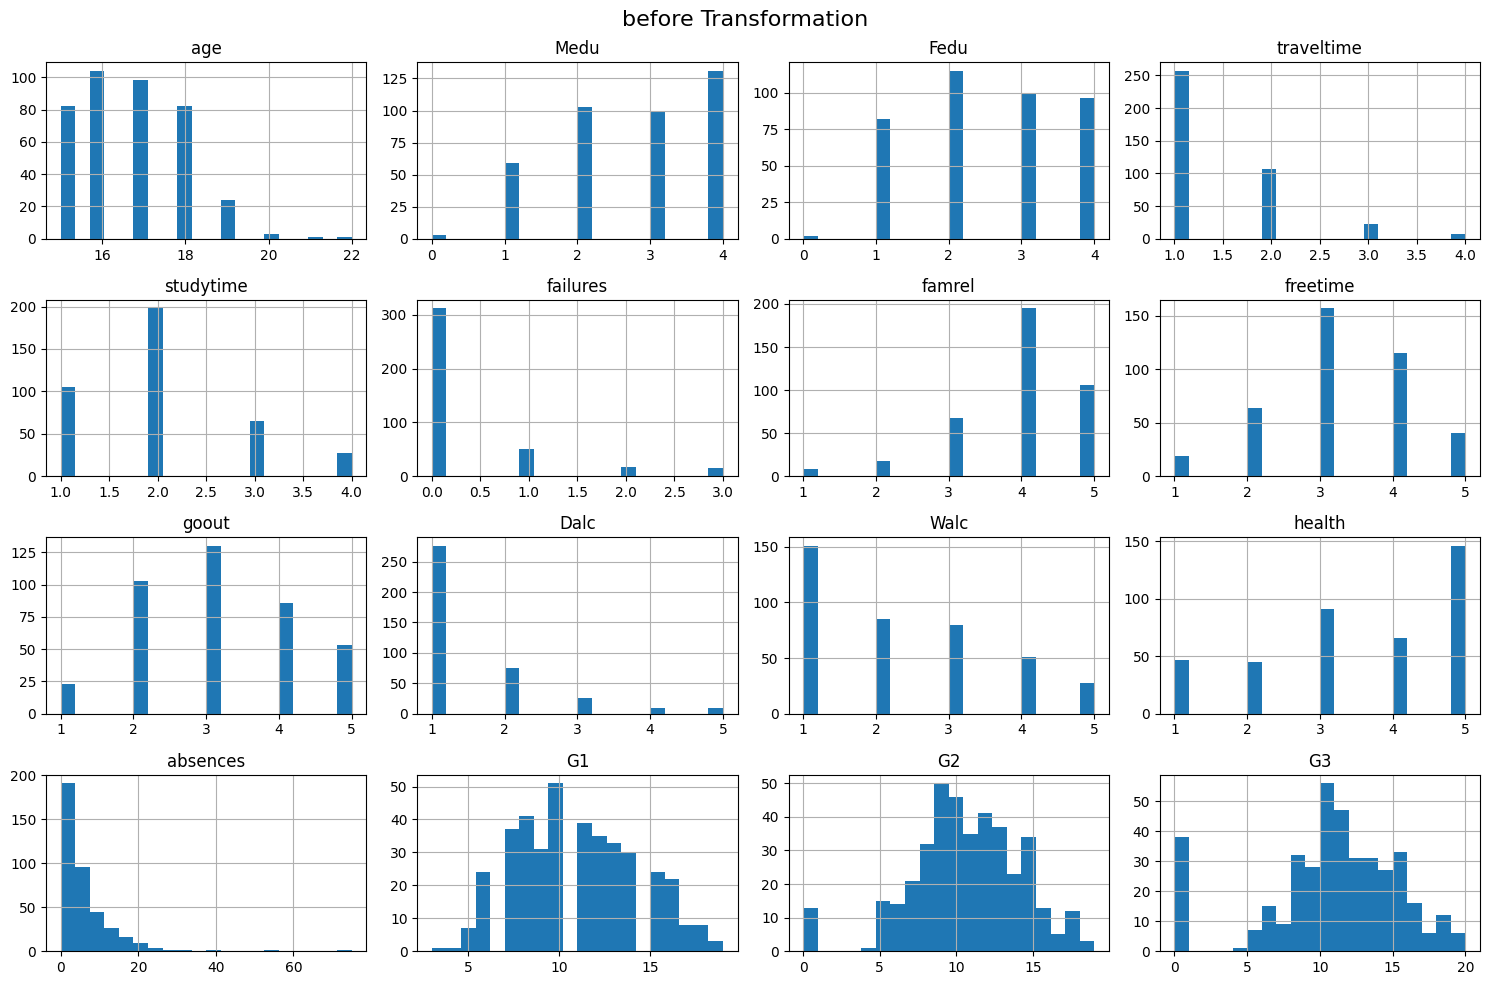

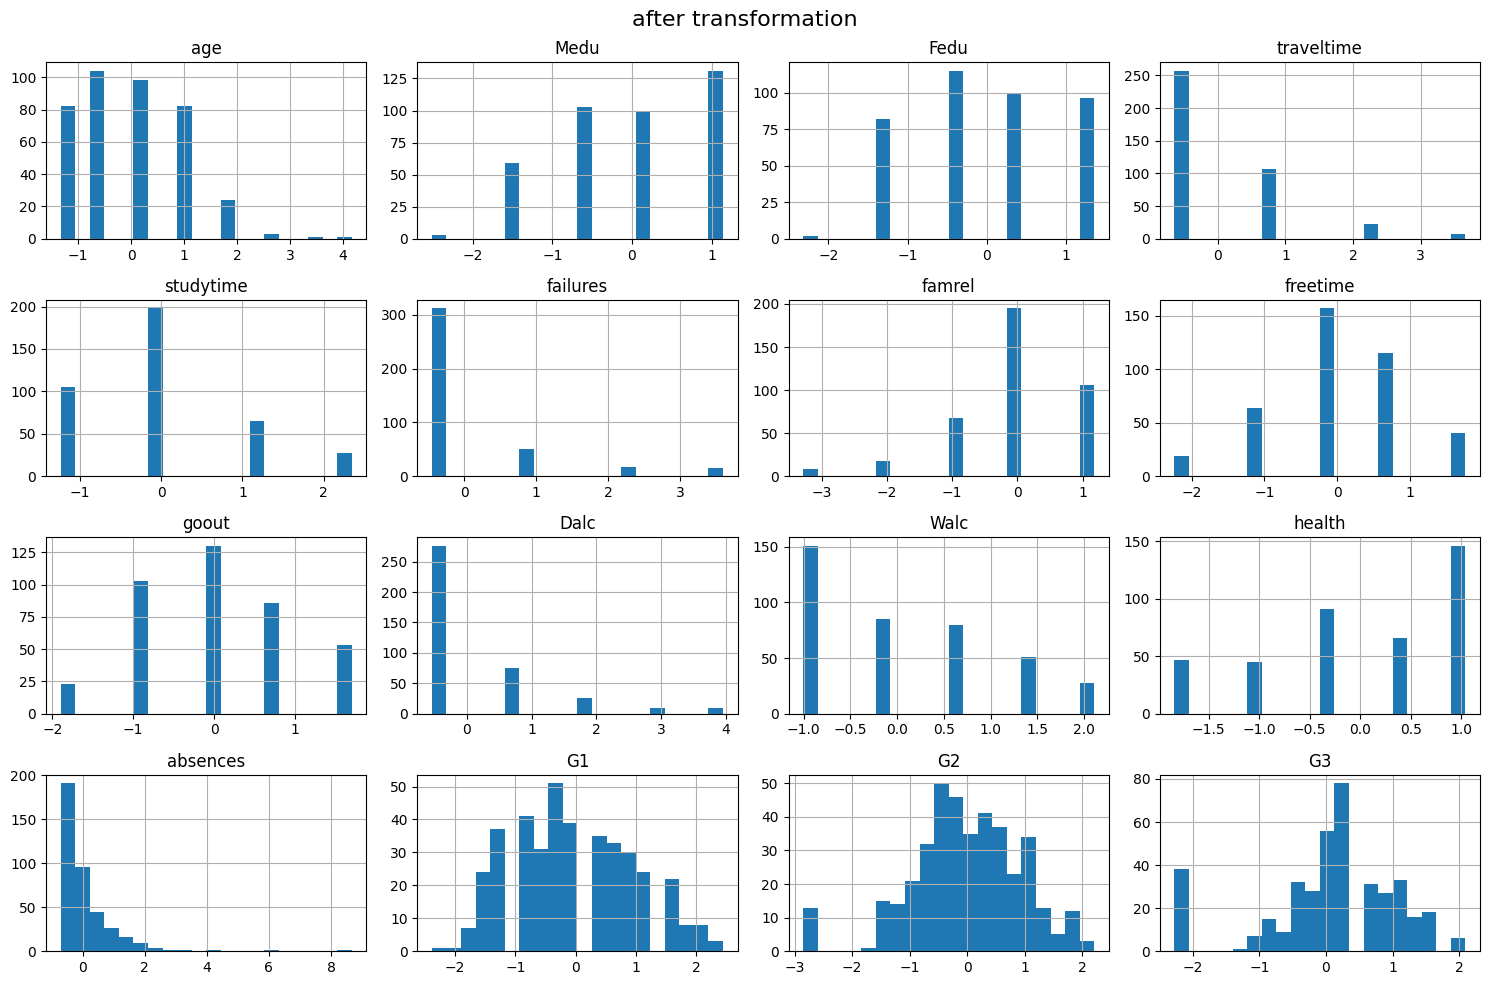

In [89]:
math_df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("before Transformation", fontsize=16)
plt.tight_layout()
plt.show()

standard_df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("after transformation", fontsize=16)
plt.tight_layout()
plt.show()

#Spliting the dataset

In [90]:
X= math_df.drop('G3', axis=1)
y= math_df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outliers


## Box plot

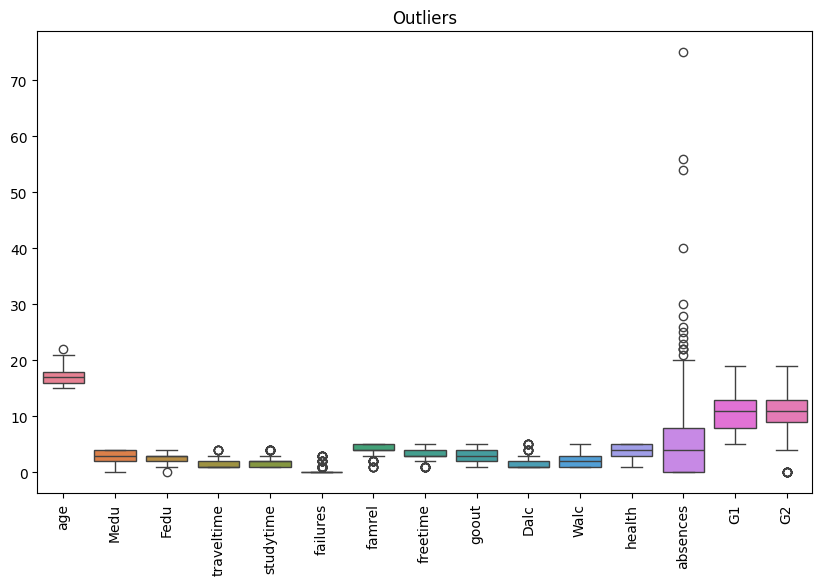

In [91]:
if 'G3' in num_cols:
    num_cols.remove('G3')

plt.figure(figsize=(10,6))
sns.boxplot(data=X_train[num_cols])
plt.xticks(rotation=90)
plt.title('Outliers')
plt.show()

## Zscore

In [92]:
from scipy.stats import zscore

z_scores = zscore(X_train[num_cols])
abs_z_scores = abs(z_scores)
outlier_mask = (abs_z_scores > 3)

outlier_counts = outlier_mask.sum(axis=0)
print(outlier_counts)

[ 2  0  0  6  0 13  6  0  0  8  0  0  4  0  0]


In [93]:
Q1 = X_train[num_cols].quantile(0.25)
Q3 = X_train[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((X_train[num_cols] < lower_bound) | (X_train[num_cols] > upper_bound)).sum()
print("Outliers per feature (IQR method):\n", outliers_iqr)


Outliers per feature (IQR method):
 age            1
Medu           0
Fedu           1
traveltime     6
studytime     21
failures      69
famrel        20
freetime      18
goout          0
Dalc          15
Walc           0
health         0
absences      14
G1             0
G2            12
dtype: int64


In [94]:
mask = ~((X_train[num_cols] < lower_bound) | (X_train[num_cols] > upper_bound)).any(axis=1)

X_train_clean = X_train.loc[mask]
y_train_clean = y_train.loc[mask]

print("Shape before removing outliers:", X_train.shape)
print("Shape after removing outliers:", X_train_clean.shape)
print("y_train shape before:", y_train.shape)
print("y_train shape after:", y_train_clean.shape)


Shape before removing outliers: (316, 32)
Shape after removing outliers: (178, 32)
y_train shape before: (316,)
y_train shape after: (178,)


# Feture selection




## Correlation matrix




In [95]:
# corr_matrix = X_train.corr().abs()

# plt.figure(figsize=(24, 17))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('correlation matrix')
# plt.show()

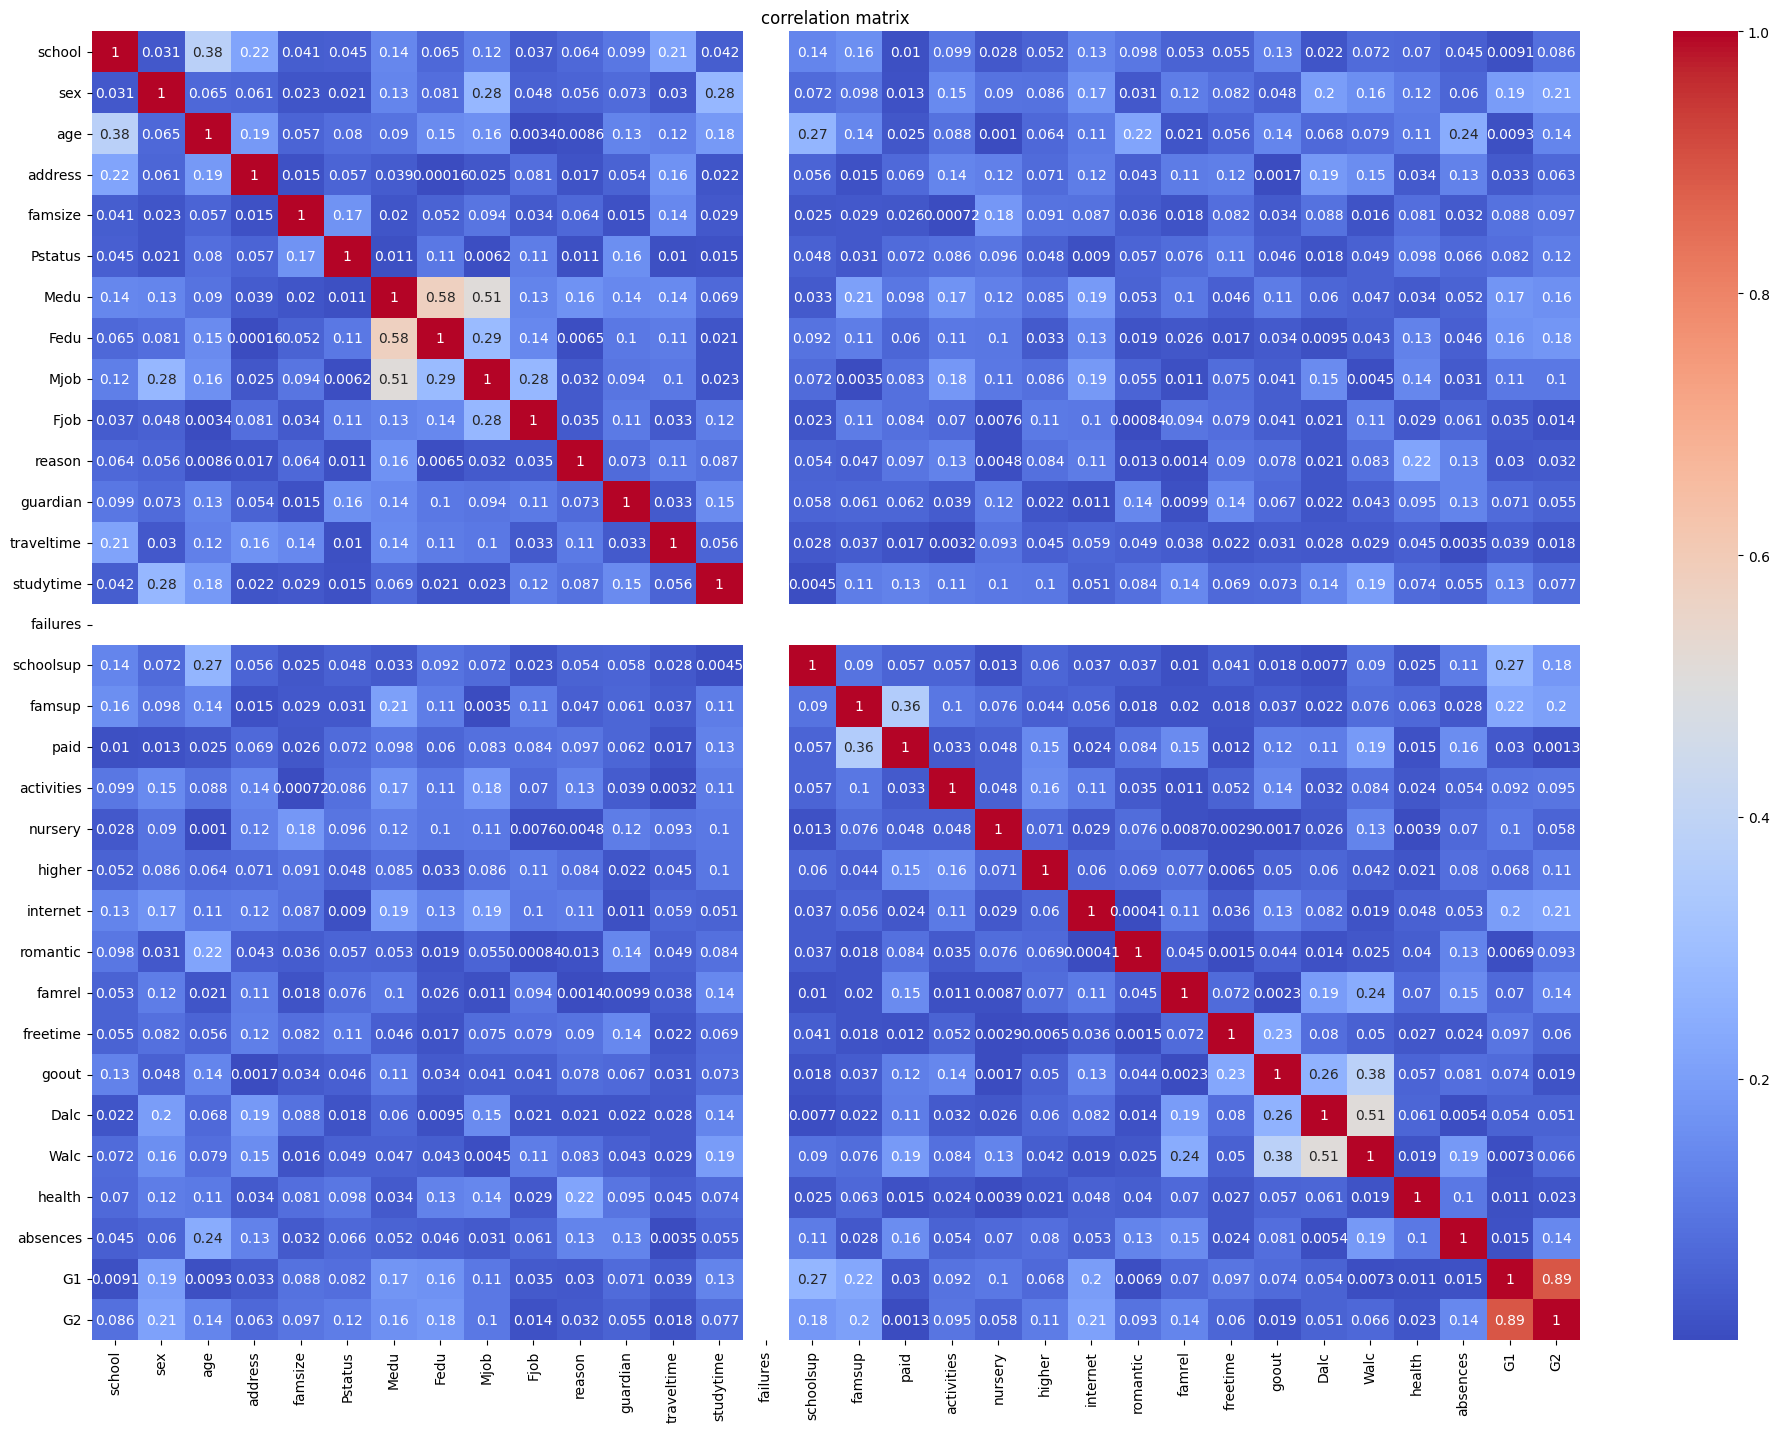

In [96]:
corr_matrix = X_train_clean.corr().abs()

plt.figure(figsize=(24, 17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [97]:
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation > 0.8 (highly correlated)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features from training and test sets
X_train_filtered = X_train_clean.drop(columns=to_drop)
X_test_filtered = X_test.drop(columns=to_drop)

In [98]:
num_cols = [col for col in num_cols if col in X_train_filtered]

# Remove 'G3' from num_cols since it's the target variable
if 'G3' in num_cols:
    num_cols.remove('G3')

pt.fit(X_train_filtered[num_cols])

X_train_num = X_train_filtered[num_cols]
X_test_num = X_test_filtered[num_cols]
#
X_train_transformed = X_train_filtered.copy()
X_test_transformed = X_test_filtered.copy()

X_train_transformed[num_cols] = pt.transform(X_train_num[num_cols])
X_test_transformed[num_cols] = pt.transform(X_test_num[num_cols])

## Lasso


In [99]:
from sklearn.linear_model import LassoCV

# Lasso with Cross Validation
lasso = LassoCV(cv=5).fit(X_train_transformed, y_train_clean)

# Show coefficients
feature_importance = pd.Series(lasso.coef_, index=X_train_transformed.columns)
selected_features = feature_importance[feature_importance != 0].index
X_train_lasso = X_train_transformed[selected_features]
X_test_lasso = X_test_transformed[selected_features]
print(X_train_lasso)

          age  activities  romantic    famrel      Dalc  absences        G1  \
181 -0.439305           1         1 -0.180134 -0.546997 -0.163124  0.205307   
194 -0.439305           0         0  1.300059 -0.546997 -1.341191  0.534642   
63  -0.439305           1         0 -1.547752  1.811551 -0.163124 -0.490079   
253 -0.439305           1         0 -1.547752 -0.546997 -1.341191 -1.245911   
331  0.480938           0         1 -0.180134 -0.546997  0.912708  0.205307   
..        ...         ...       ...       ...       ...       ...       ...   
394  2.032745           0         0 -1.547752  1.885437  0.594777 -1.245911   
20  -1.480722           0         0 -0.180134 -0.546997 -1.341191  0.534642   
188  0.480938           0         1 -1.547752 -0.546997  0.764889 -1.245911   
348  0.480938           1         1 -0.180134 -0.546997 -1.341191  0.534642   
102 -1.480722           1         0  1.300059 -0.546997  0.394314 -0.490079   

           G2  
181  0.484628  
194  0.808414  
63 

# Model training

## LinearRegression

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

0.7545777855043501
Mean Squared Error: 5.03239410886674
R-squared: 0.7545777855043501


In [101]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_lasso, y_train_clean)

y_pred = model.predict(X_test_lasso)

from sklearn.metrics import mean_squared_error, r2_score

mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Mean Squared Error: 4.492650241968306
R-squared: 0.7809002738089255


## RandomForestRegressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rrf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rrf, X_train_lasso, y_train_clean, cv=5, scoring='r2')


rrf.fit(X_train_lasso, y_train_clean)

y_pred_rf = rrf.predict(X_test_lasso)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Cross-validated R^2 scores:", scores)
print("Mean CV R^2:", scores.mean())

print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Cross-validated R^2 scores: [0.84227385 0.83918069 0.85963939 0.84549891 0.69838424]
Mean CV R^2: 0.8169954135978553
Mean Squared Error: 3.9197974683544308
R-squared: 0.80883743318851


In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [ None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid =GridSearchCV(estimator=rrf,
                   param_grid=param_grid,
                   cv=5,
                   scoring='r2',
                   n_jobs=-1,
                   verbose=2
                   )

grid.fit(X_train_lasso, y_train_clean)

print("best parameters: ", grid.best_params_)
best_rf = grid.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [104]:
y_pred_rf = best_rf.predict(X_test_lasso)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf)
r2_rf_tuned = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse_rf_tuned)
print("R-squared:", r2_rf_tuned)

Mean Squared Error: 4.0232938878367595
R-squared: 0.8037900700622854


## XGBoost

In [105]:
from xgboost import XGBRegressor


# Instantiate model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)

# Train the model
xgb_model.fit(X_train_lasso, y_train_clean)

# Predict
y_pred_xg = xgb_model.predict(X_test_lasso)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xg)
r2_xgb = r2_score(y_test, y_pred_xg)
cv_scores = cross_val_score(xgb_model, X_train_lasso, y_train_clean, cv=5, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean CV R^2:", cv_scores.mean())
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)


Cross-validated R^2 scores: [0.87492692 0.78978682 0.71038693 0.91572833 0.69722873]
Mean CV R^2: 0.7976115465164184
Mean Squared Error: 5.72174596786499
R-squared: 0.7209591865539551


In [106]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid_xg = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xg,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_lasso, y_train_clean)

print("Best parameters:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)




Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
Best CV R2: 0.8530375242233277


In [107]:
best_xgb = grid_search.best_estimator_

# Predict on test set
y_pred_xgb = best_xgb.predict(X_test_lasso)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb)

print(f"Test MSE: {mse_xgb_tuned:.4f}")
print(f"Test R²: {r2_xgb_tuned:.4f}")


Test MSE: 4.6762
Test R²: 0.7720


# Model Evaluation

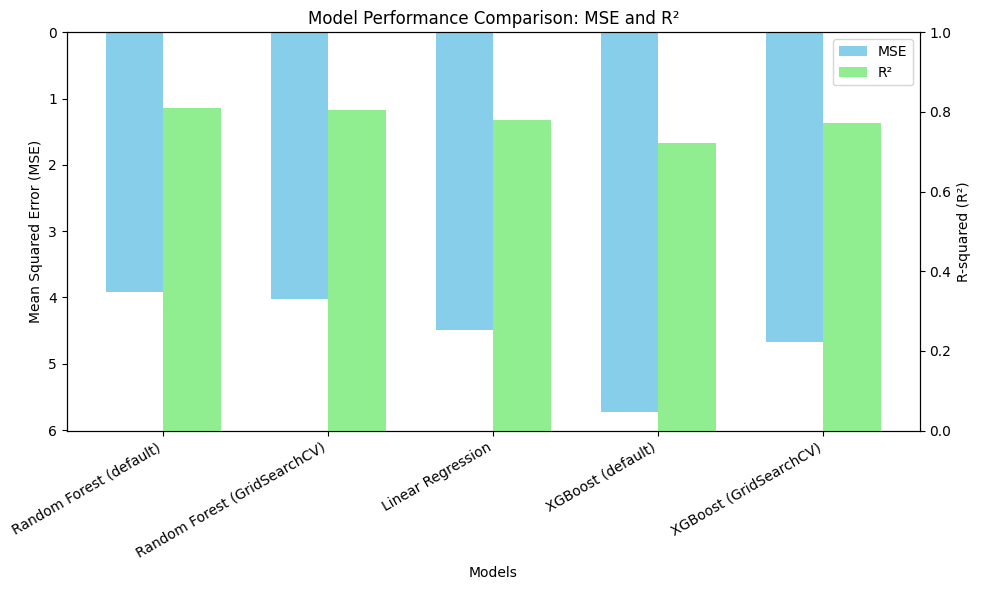

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Define your model names
models = [
    'Random Forest (default)',
    'Random Forest (GridSearchCV)',
    'Linear Regression',
    'XGBoost (default)',
    'XGBoost (GridSearchCV)'
]

mse_scores = [
    mse_rf,
    mse_rf_tuned,
    mse_linear,
    mse_xgb,
    mse_xgb_tuned
]

r2_scores = [
    r2_rf,
    r2_rf_tuned,
    r2_linear,
    r2_xgb,
    r2_xgb_tuned
]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))

bars1 = ax1.bar(x - width/2, mse_scores, width, label='MSE', color='skyblue')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=30, ha='right')
ax1.invert_yaxis()

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, r2_scores, width, label='R²', color='lightgreen')
ax2.set_ylabel('R-squared (R²)')
ax2.set_ylim(0, 1)

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Model Performance Comparison: MSE and R²')
plt.tight_layout()
plt.show()
